# Explore here

In [4]:
# Your code here
import pandas as pd

df = pd.read_csv('../data/raw/River_Arno.csv')
df



,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
0,01/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.82
1,02/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94
2,03/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11
3,04/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.84
4,05/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8212,26/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.34
8213,27/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.21
8214,28/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.30
8215,29/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.19


In [16]:
ts = pd.DataFrame()
ts['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
ts['Hydrometry_Nave_di_Rosano']= df['Hydrometry_Nave_di_Rosano']
ts.index = ts['Date']
ts.drop(columns='Date', axis=1, inplace=True)

ts


,Hydrometry_Nave_di_Rosano
Date,
1998-01-01,1.82
1998-01-02,1.94
1998-01-03,2.11
1998-01-04,1.84
1998-01-05,1.88
...,...
2020-06-26,1.34
2020-06-27,1.21
2020-06-28,1.30


In [22]:
ts.isnull().sum()

Hydrometry_Nave_di_Rosano    48
dtype: int64

In [30]:
ts = ts.interpolate(method='linear')
ts.isnull().sum()

Hydrometry_Nave_di_Rosano    0
dtype: int64

In [20]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 45.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 35.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


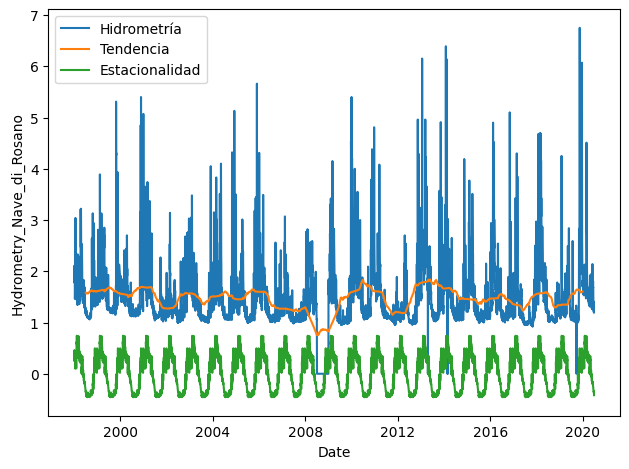

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


decomp = seasonal_decompose(ts, period = 365) #darle un periodo a la descomposicion, puedes ver tendencia vs sesonaliadad

trend = decomp.trend
seasonal = decomp.seasonal

import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(data=ts, x = ts.index, y = ts.Hydrometry_Nave_di_Rosano, label="Hidrometría")
sns.lineplot(data = trend, label="Tendencia")
sns.lineplot(data=seasonal, label="Estacionalidad")
plt.tight_layout()
plt.show()


Aca falta un test para ver la seasonality

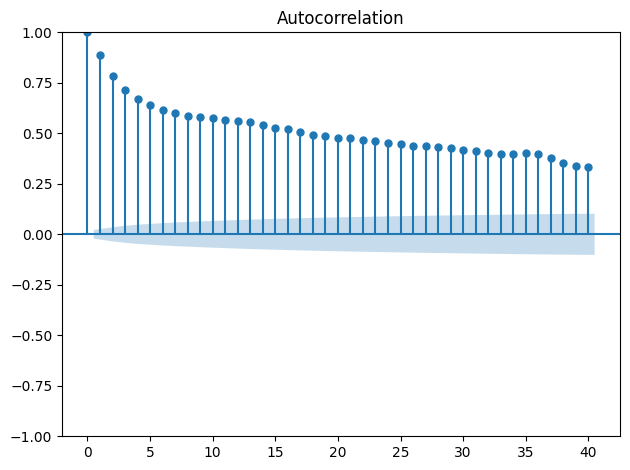

In [36]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ts)
plt.tight_layout()
plt.show()

Me quede en la parte de downgrade la version de python, para que sea compatible con pdarima
